Detect Spam Emails

import important libraries

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import string
import nltk


from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

download stopwords for preprocessing

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

import dataset

In [7]:
dataset=pd.read_csv('/content/spam_ham_dataset.csv')

In [8]:
dataset

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


show data and info about it

In [9]:
dataset.text.iloc[5]

'Subject: ehronline web address change\r\nthis message is intended for ehronline users only .\r\ndue to a recent change to ehronline , the url ( aka " web address " ) for accessing ehronline needs to be changed on your computer . the change involves adding the letter " s " to the " http " reference in the url . the url for accessing ehronline should be : https : / / ehronline . enron . com .\r\nthis change should be made by those who have added the url as a favorite on the browser .'

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


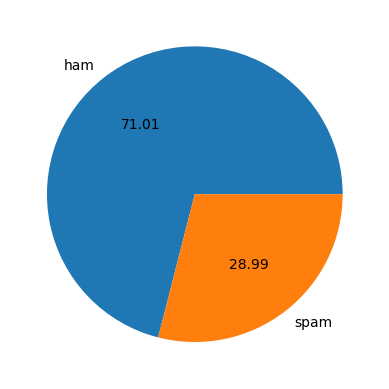

In [11]:
import matplotlib.pyplot as plt
plt.pie(dataset['label'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

stemming

In [12]:
stemmer=PorterStemmer()

In [13]:
stemmer=PorterStemmer()
corpus=[]
stopwords_set=set(stopwords.words('english'))
for i in range(len(dataset)):
  text=dataset['text'].iloc[i].lower()
  text=text.translate(str.maketrans('','',string.punctuation)).split()
  text=[stemmer.stem(word )for word in text if word not in stopwords_set]
  text=' '.join(text)
  corpus.append(text)

In [14]:
print("email after stemming",corpus[0])

email after stemming subject enron methanol meter 988291 follow note gave monday 4 3 00 preliminari flow data provid daren pleas overrid pop daili volum present zero reflect daili activ obtain ga control chang need asap econom purpos


In [15]:
print("email before stemming",dataset.text.iloc[0])

email before stemming Subject: enron methanol ; meter # : 988291
this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary
flow data provided by daren } .
please override pop ' s daily volume { presently zero } to reflect daily
activity you can obtain from gas control .
this change is needed asap for economics purposes .


convert text data into numbers

In [16]:
vectorizer=CountVectorizer()

x=vectorizer.fit_transform(corpus).toarray()
y=dataset.label_num


In [17]:
x[0]

array([1, 0, 0, ..., 0, 0, 0])

train,test split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

build our model

In [19]:
model=RandomForestClassifier(n_jobs=-1)
model.fit(x_train,y_train)

RandomForestClassifier(n_jobs=-1)

In [20]:
model.score(x_test,y_test)

0.9690821256038648

prediction "check if mail is spam or not"

In [22]:
email_to_classify=dataset.text.values[14]

In [23]:
email_to_classify

'Subject: tenaska iv july\r\ndarren :\r\nplease remove the price on the tenaska iv sale , deal 384258 , for july and enter the demand fee . the amount should be $ 3 , 902 , 687 . 50 .\r\nthanks ,\r\nmegan'

In [24]:
email=email_to_classify.lower().translate(str.maketrans('','',string.punctuation)).split()
email=[stemmer.stem(word) for word in email if word not in stopwords_set]
email=' '.join(email)

email_corpus=[email]
x_email=vectorizer.transform(email_corpus)

In [25]:
x=model.predict(x_email)
predict=x[0]
print("predicted value =",predict)

predicted value = 0


In [27]:
actual=dataset.label_num.iloc[14]
print("actual value =",actual)

actual value = 0


In [28]:
y_pred=model.predict(x_test)

Acucuraccy ,precision , Recall ,F1_score

In [35]:
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

print("Accuracy =",accuracy)
print("precision =",precision)
print("recall =",recall)
print("f1 score =",f1)


Accuracy = 0.9690821256038648
precision = 0.9411764705882353
recall = 0.9536423841059603
f1 score = 0.9473684210526316


Confusion Matrix

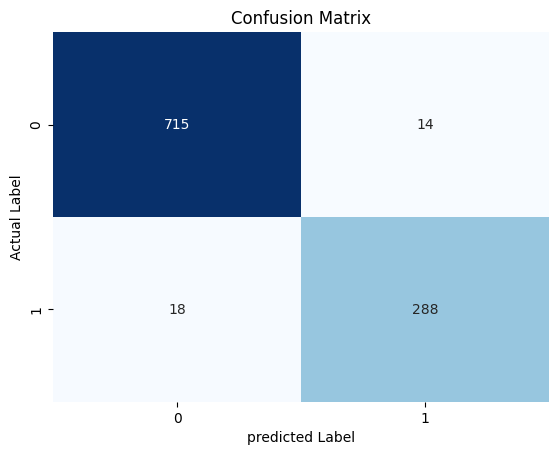

In [34]:
conf_matrix = confusion_matrix(y_pred, y_test)
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',cbar=False)
plt.xlabel('predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')

plt.show()
